In [1]:
import csv
import numpy as np
from numpy import genfromtxt
import pandas as pd
import glob
import random
import sys
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
N = '05'
Batch = int(N)

In [7]:
S01 = np.transpose((0,0,0,0,0,0,0,0,0,0))
S05 = np.transpose((0,0,0,0,0,0,0,0,0,0))
Ram = np.transpose((0,0,0,0,0,0,0,0,0,0))

A = genfromtxt('../DataGen/HFData/ExpT25C/Batch'+N+'.txt')
j=0
while j<len(A):
    if A[j][4] == 1 and A[j][5] == 25 and A[j][6] == 0.1:
        S01 = np.vstack((S01,A[j]))
    j=j+1
    
A = genfromtxt('../DataGen/HFData/ExpT40C/Batch'+N+'.txt')
j=0
while j<len(A):
    if A[j][4] == 1 and A[j][5] == 25 and A[j][6] == 0.1:
        S05 = np.vstack((S05,A[j]))
    j=j+1
    
A = genfromtxt('../DataGen/HFData/ExpRm2/Batch'+N+'.txt')
j=0
while j<len(A):
    if A[j][4] == 1 and A[j][5] == 25 and A[j][6] == 0.1:
        Ram = np.vstack((Ram,A[j]))
    j=j+1

S01 = np.delete(S01, (0), axis=0)
S05 = np.delete(S05, (0), axis=0)
Ram = np.delete(Ram, (0), axis=0)

In [21]:
Vis01 = np.log10(S01.reshape((-1,1))[9::10])
Shr01 = np.log10(S01.reshape((-1,1))[8::10])

Vis05 = np.log10(S05.reshape((-1,1))[9::10])
Shr05 = np.log10(S05.reshape((-1,1))[8::10])

Vis15 = np.log10(Ram.reshape((-1,1))[9::10])
Tmp15 = Ram.reshape((-1,1))[7::10]

In [37]:
Vis15


array([[ 0.33053755],
       [ 0.32585828],
       [ 0.31515764],
       [ 0.3060195 ],
       [ 0.29838361],
       [ 0.28676176],
       [ 0.27766651],
       [ 0.2692864 ],
       [ 0.26256024],
       [ 0.2547921 ],
       [ 0.24428454],
       [ 0.23430211],
       [ 0.22637045],
       [ 0.21969191],
       [ 0.21008566],
       [ 0.20077665],
       [ 0.19193143],
       [ 0.18414609],
       [ 0.17703121],
       [ 0.16815852],
       [ 0.15734191],
       [ 0.14778759],
       [ 0.14020626],
       [ 0.13356765],
       [ 0.12552681],
       [ 0.11690315],
       [ 0.10816572],
       [ 0.10005677],
       [ 0.0924013 ],
       [ 0.08171087],
       [ 0.07349473],
       [ 0.06471624],
       [ 0.05693152],
       [ 0.04856609],
       [ 0.04154269],
       [ 0.03355644],
       [ 0.02506817],
       [ 0.0143441 ],
       [ 0.00609363],
       [-0.00127304],
       [-0.00744162],
       [-0.01668816],
       [-0.02734597],
       [-0.03434965],
       [-0.04301707],
       [-0

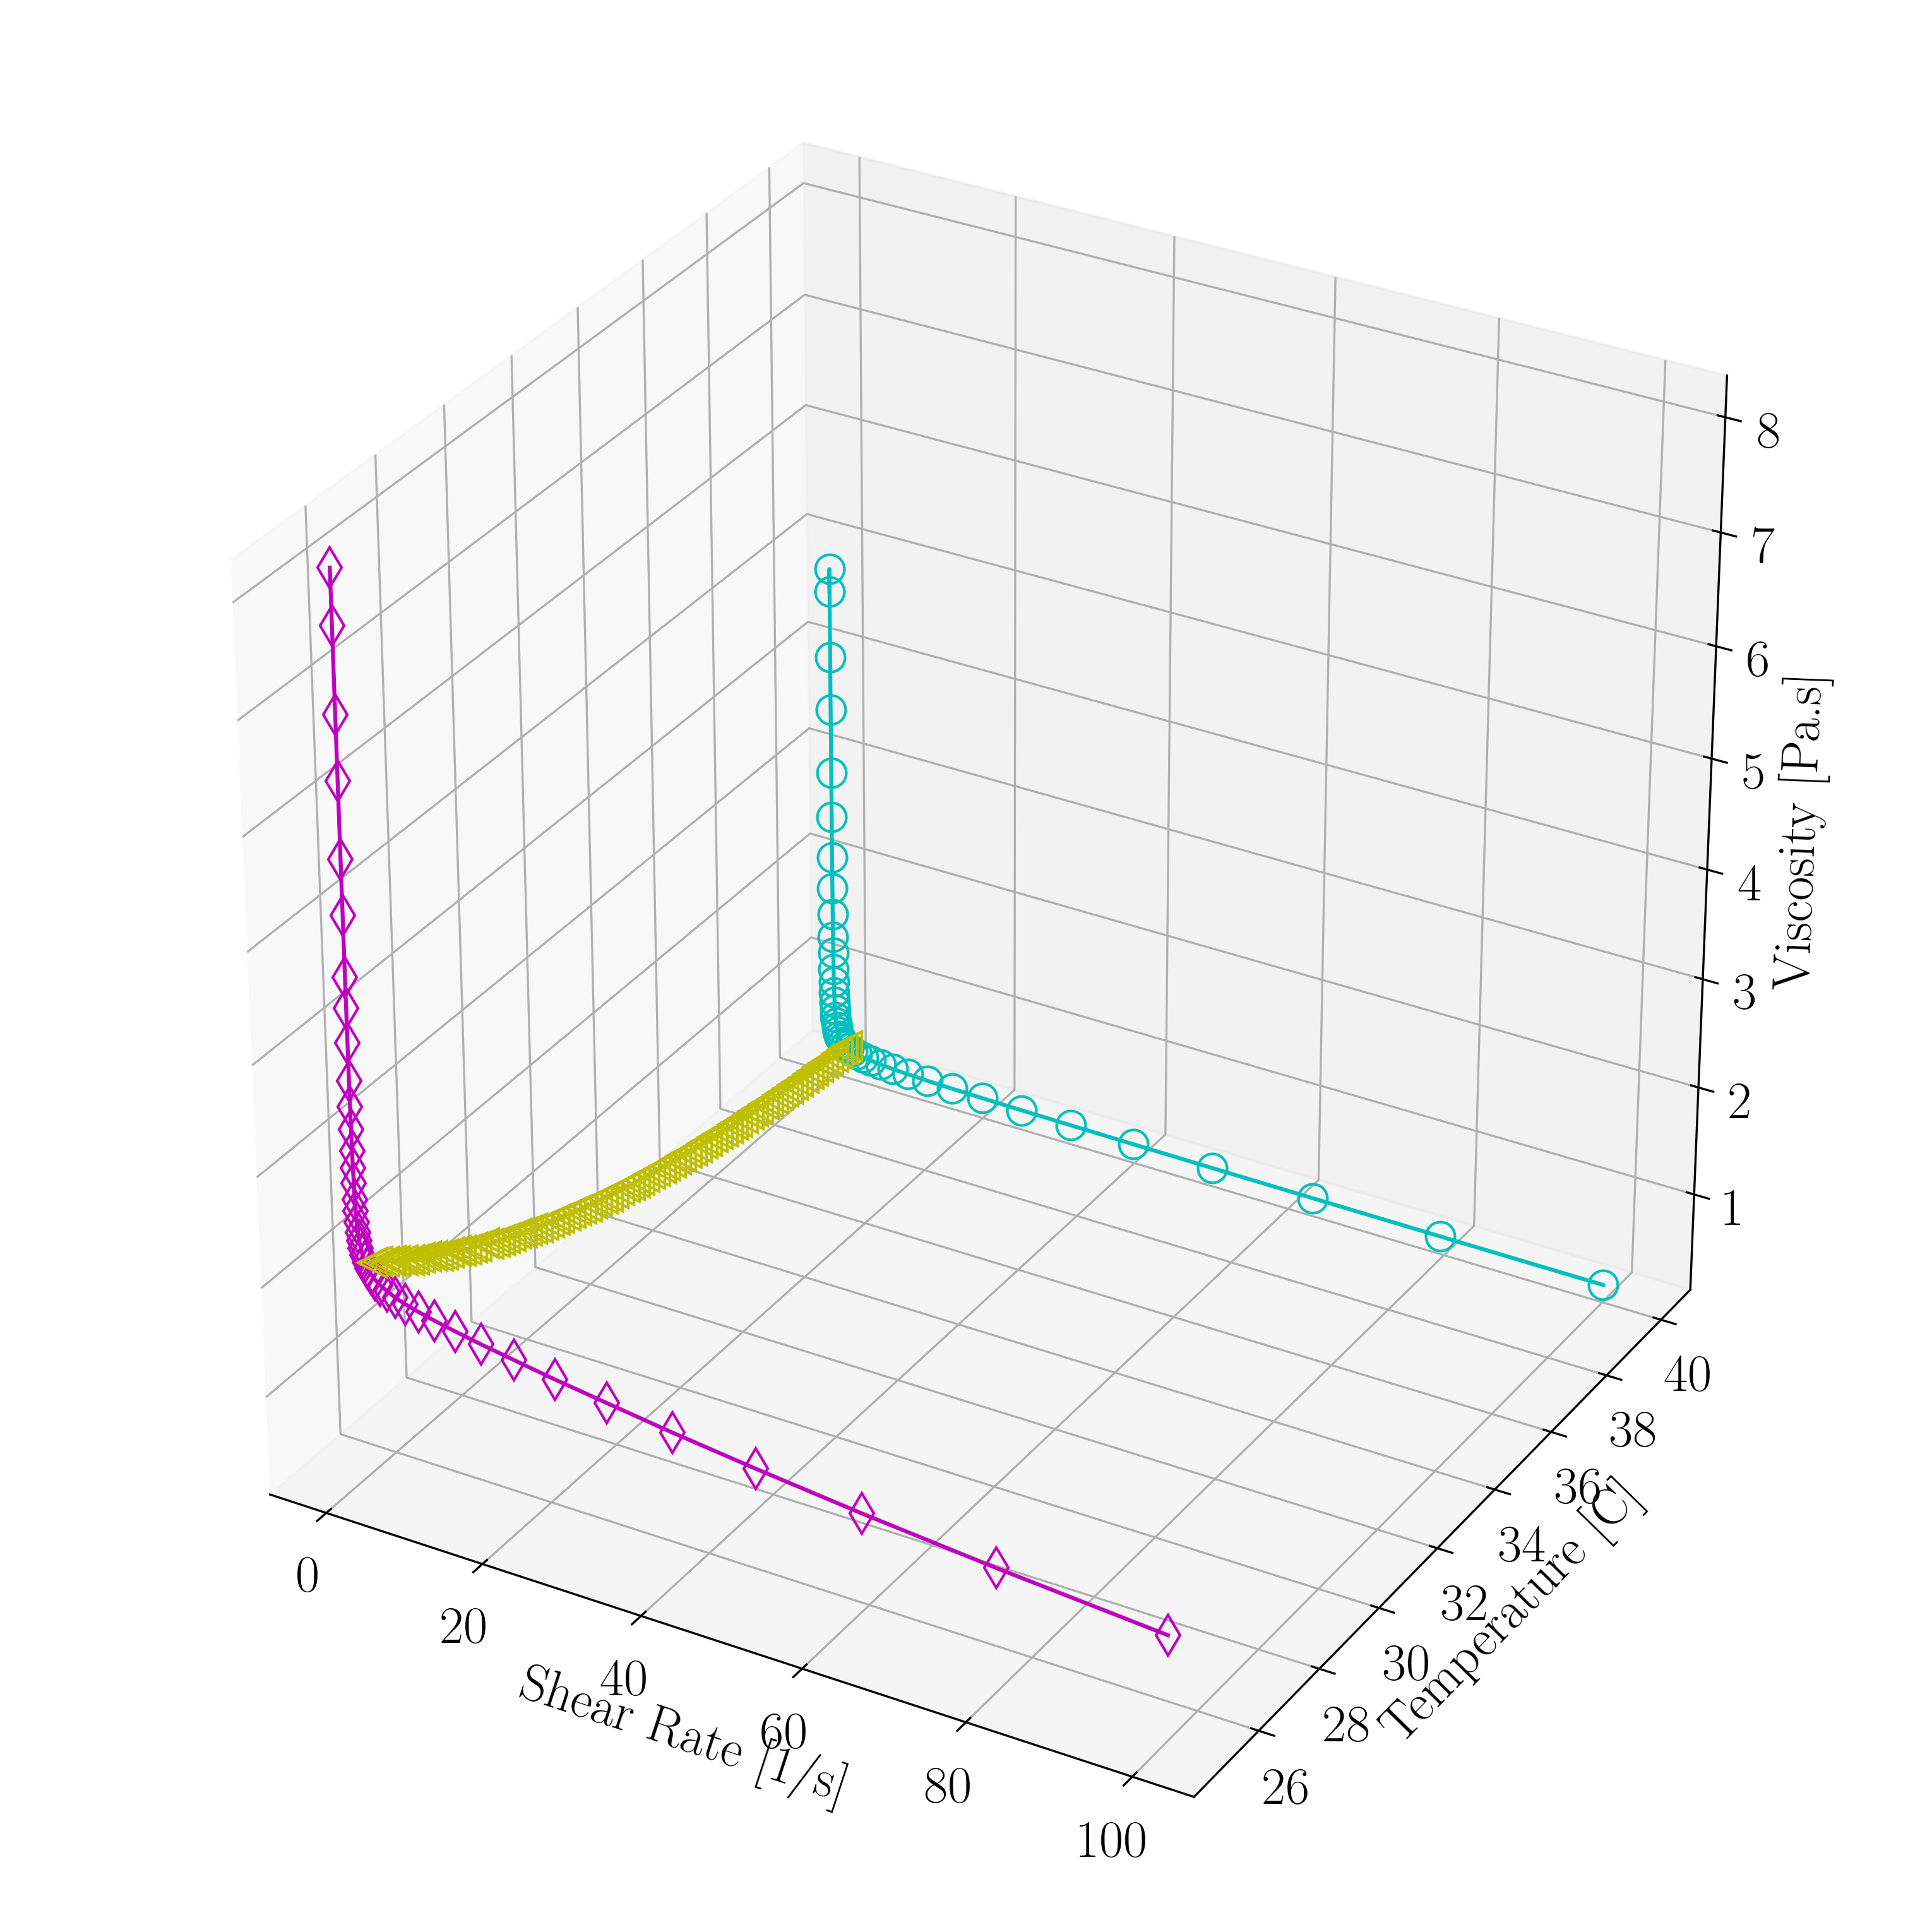

In [29]:
Batch = 5
a=0
b=2
import matplotlib.font_manager
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10,10),facecolor='w',dpi=300)
#ax = plt.axes(projection='3d')
ax = Axes3D(fig)

plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=22)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=22)    # legend fontsize
plt.rc('figure', titlesize=22)  # fontsize of the figure title

ax.plot3D(np.power(10,Shr01).flatten(), 25 * np.ones(len(Vis01)).flatten(), np.power(10,Vis01).flatten(),
          'md-', markerfacecolor='none', linewidth=1.5, markersize = 11.0)
ax.plot3D(np.power(10,Shr05).flatten(), 40 * np.ones(len(Vis01)).flatten(), np.power(10,Vis05).flatten(), 
          'co-', markerfacecolor='none', linewidth=1.5, markersize = 11.0)
ax.plot3D(2 * np.ones(len(Vis15)).flatten(), Tmp15.flatten(), np.power(10,Vis15).flatten(), 
          'y<-', markerfacecolor='none', linewidth=1.5, markersize = 11.0)

ax.set_xlabel('Shear Rate [1/s]', fontname = 'Times New Roman', fontsize=20)
ax.set_ylabel('Temperature [C]', fontname = 'Times New Roman', fontsize=20)
ax.set_zlabel('Viscosity [Pa.s]', fontname = 'Times New Roman', fontsize=20)
#ax.set_legend(['Experiment Temperature = 25C','Experiment Temperature = 40C','Salt Level = 10'],loc='upper right')
#plt.title('Actual and Predicted Flow Curve for a Random Batch')

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.zaxis.set_tick_params(labelsize=20)

#ax.set_xscale('log')
#ax.set_yscale('log')
#ax.set_zscale('log')

#plt.savefig('Exp_ExT_Batch05.png',bbox_inches = 'tight')

plt.show()

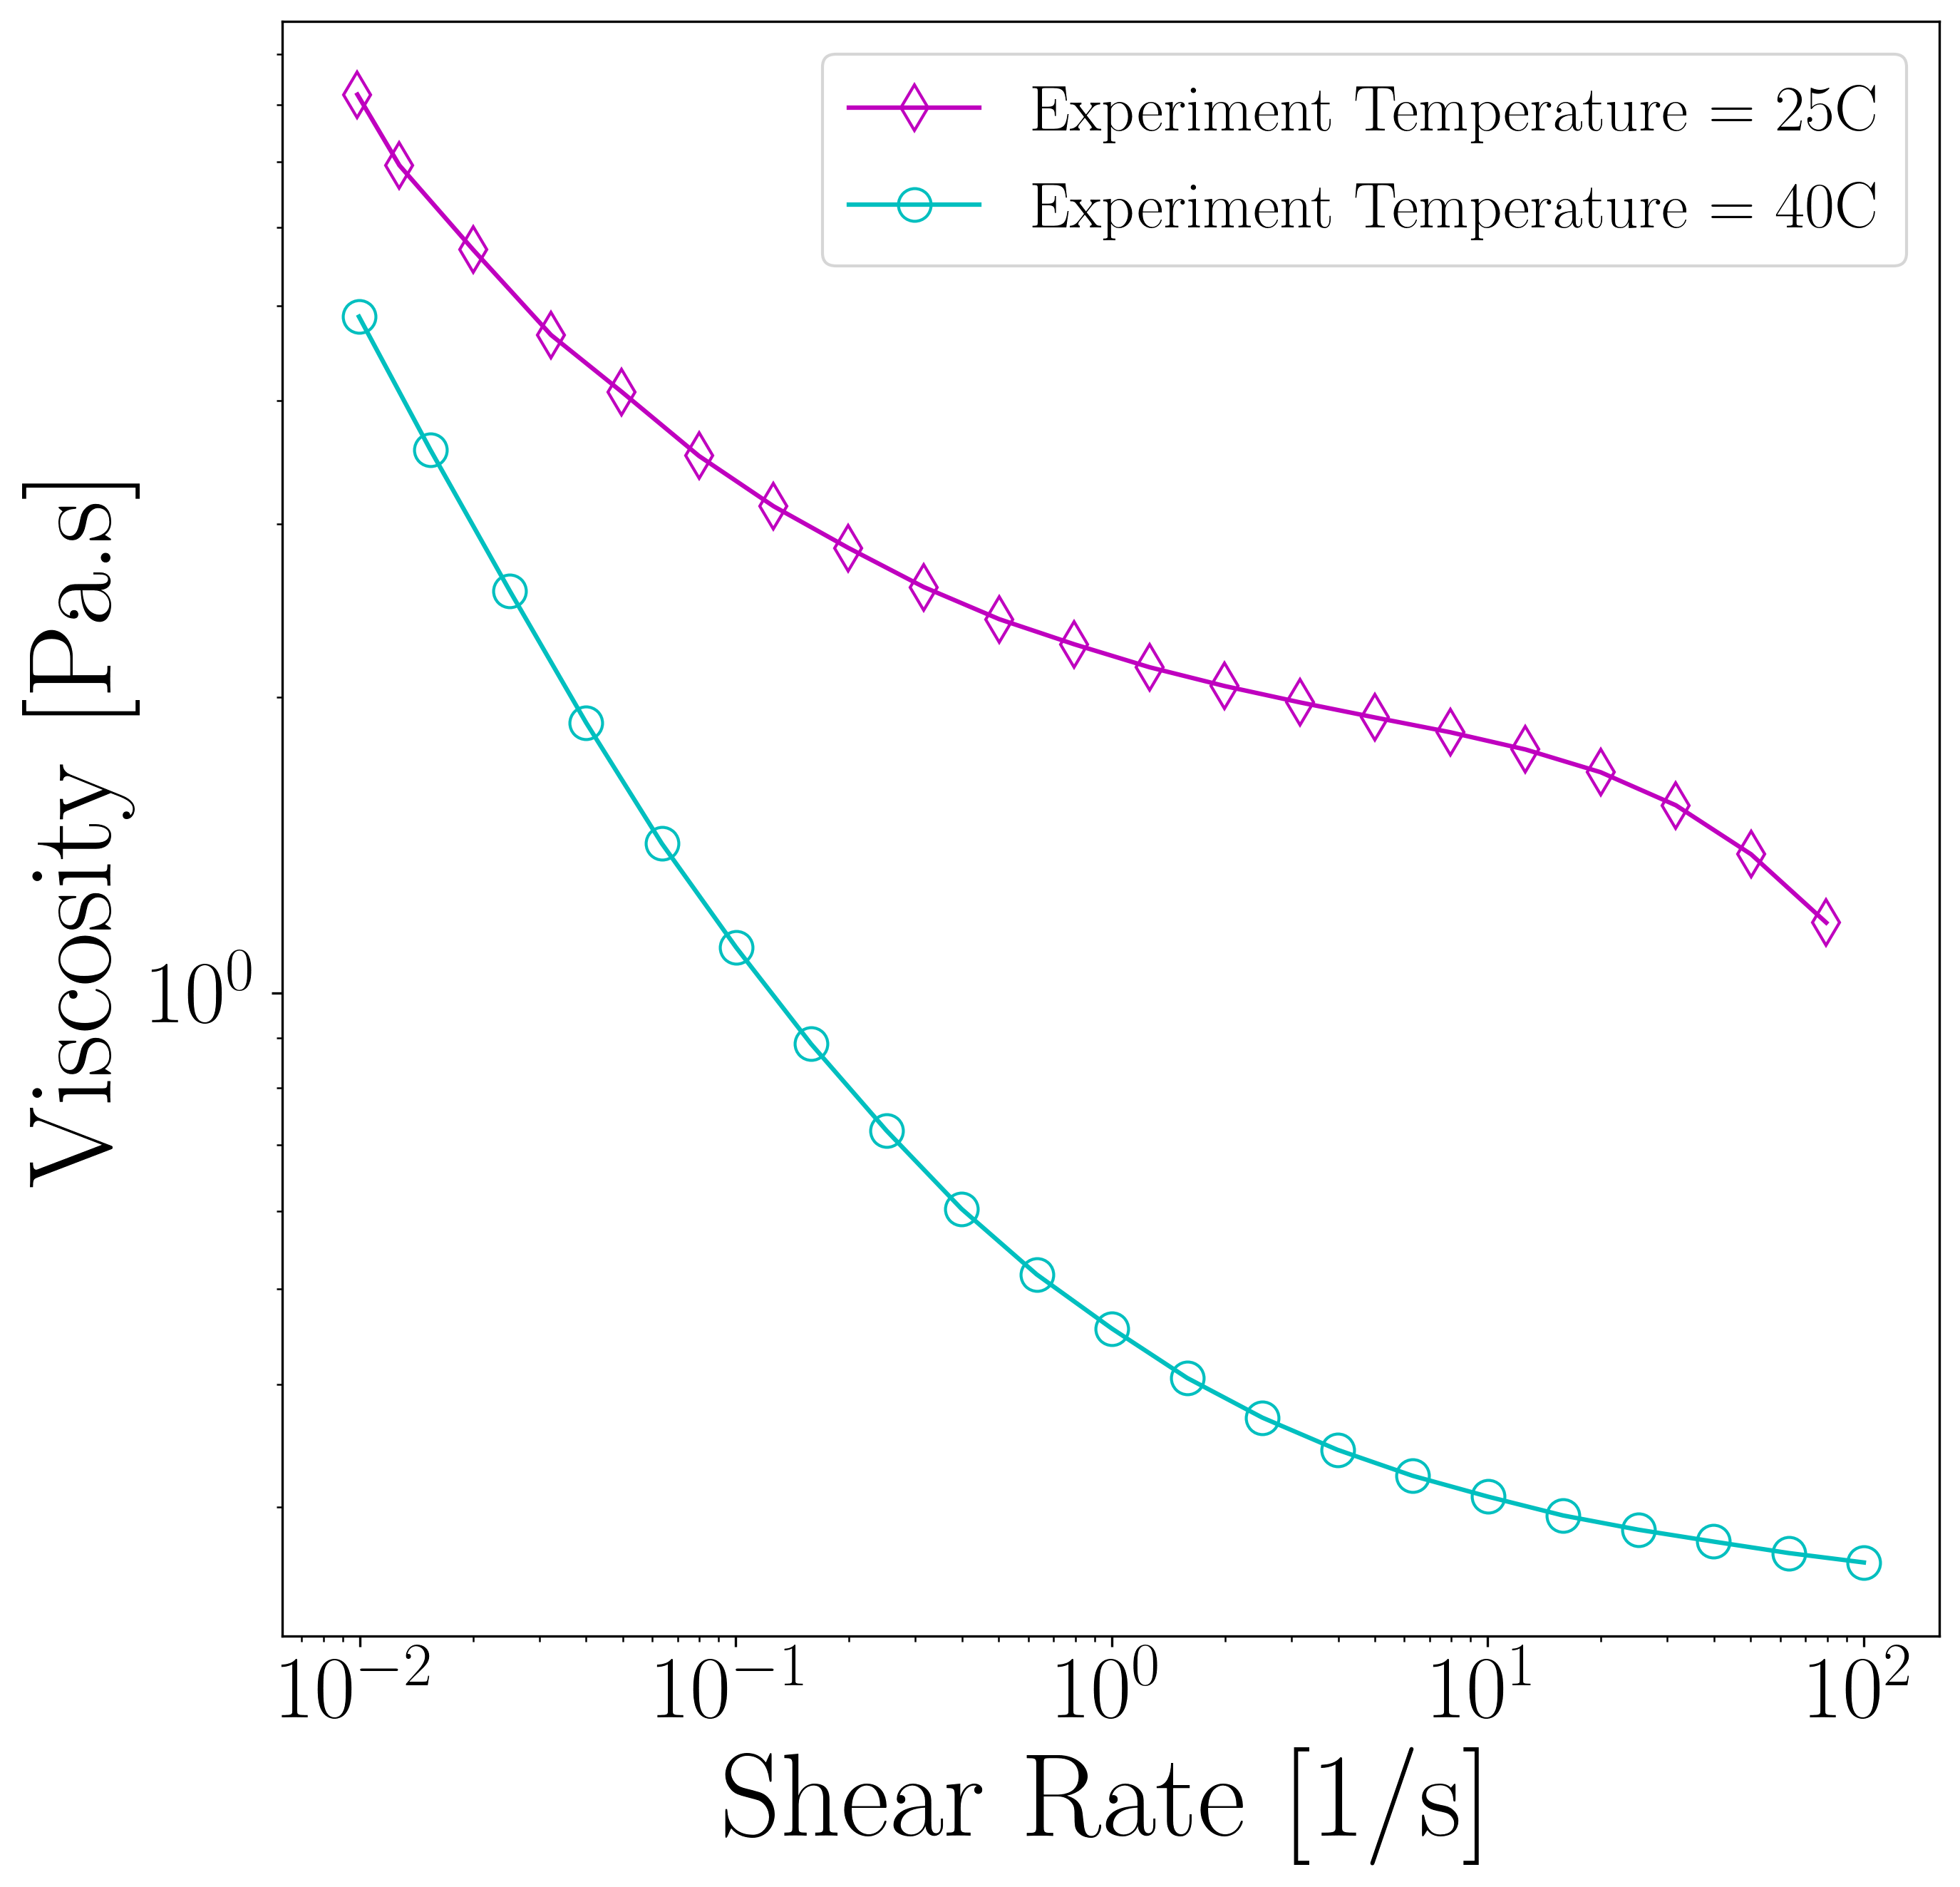

In [7]:
Batch = 5
a=0
b=2
import matplotlib.font_manager
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

plt.figure(figsize=(10,10),dpi=300)

plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=22)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=22)    # legend fontsize
plt.rc('figure', titlesize=22)  # fontsize of the figure title

plt.plot(np.power(10,Shr01[1::2]),np.power(10,Vis01[1::2]) , 'md-', markerfacecolor='none', linewidth=1.5, markersize = 11.0)
plt.plot(np.power(10,Shr05[0::2]),np.power(10,Vis05[0::2]) , 'co-', markerfacecolor='none', linewidth=1.5, markersize = 11.0)
#plt.plot(np.power(10,Shr10[1::2]),np.power(10,Vis10[1::2]) , 'y<-' , markerfacecolor='none', linewidth=1.5, markersize = 11.0)

plt.xlabel('Shear Rate [1/s]', fontname = 'Times New Roman', fontsize=40)
plt.ylabel('Viscosity [Pa.s]', fontname = 'Times New Roman', fontsize=40)
plt.legend(['Experiment Temperature = 25C','Experiment Temperature = 40C','Salt Level = 10'],loc='upper right')
#plt.title('Actual and Predicted Flow Curve for a Random Batch')

plt.xticks(np.arange(0,10, 1.0),fontname = "Times New Roman", fontsize=30)
plt.yticks(fontname = "Times New Roman", fontsize=30)
#plt.ylim(0.6,13)
plt.xscale("log")
plt.yscale("log")

plt.savefig('Exp_ExT_Batch05.png',bbox_inches = 'tight')

plt.show()